![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [53]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [54]:
#statiscal summary of the dataset to provide insight into outliers 
#and variance in the dataset
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [55]:
penguins_dummies = pd.get_dummies(penguins_df['sex'], drop_first=True)
penguins_dummies = pd.concat([penguins_df, penguins_dummies], axis=1)
penguins_dummies = penguins_dummies.drop('sex', axis=1)
penguins_dummies.head(10)                   

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
5,38.9,17.8,181.0,3625.0,0
6,39.2,19.6,195.0,4675.0,1
7,41.1,17.6,182.0,3200.0,0
8,38.6,21.2,191.0,3800.0,1
9,36.6,17.8,185.0,3700.0,0


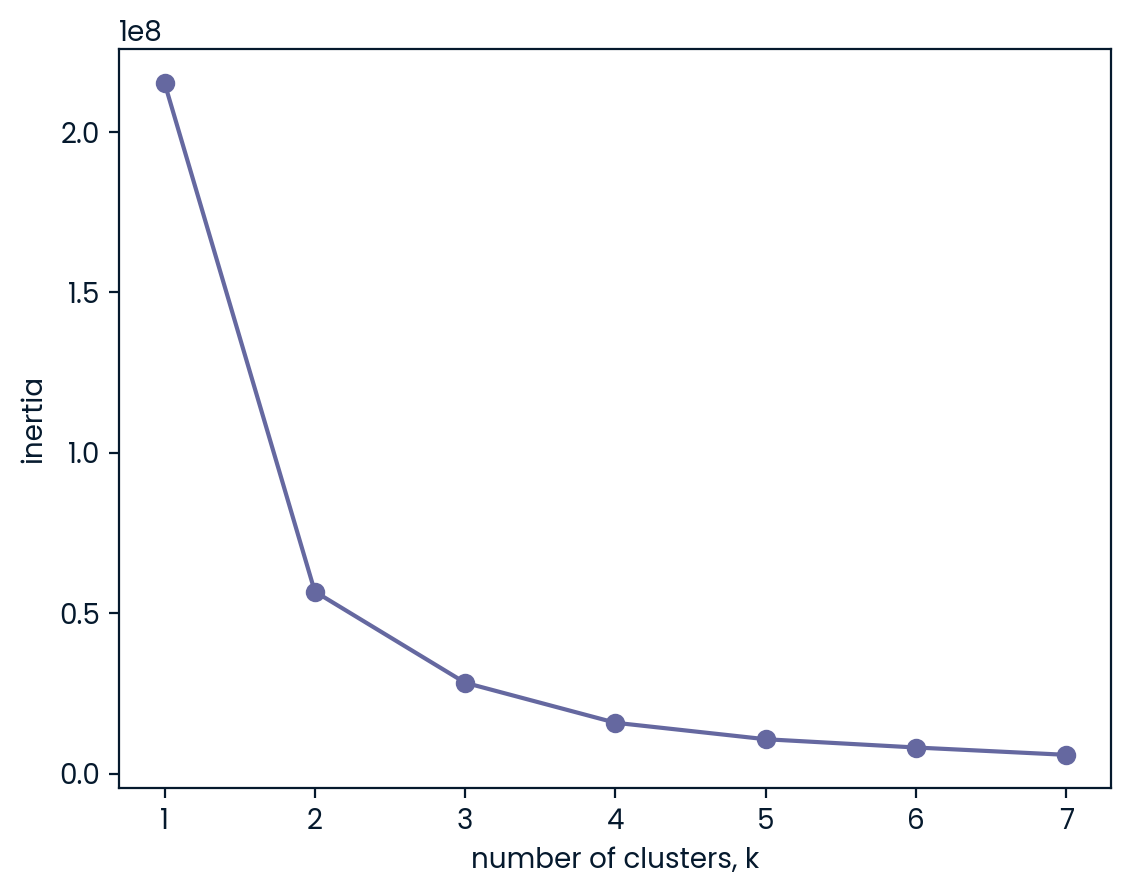

In [56]:
#using an inertia plot to visualize the optimal number of clusters in the dataset
ks = range(1,8)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    #fit the model to the preprocessed data
    model.fit(penguins_dummies)
    #add inertia values to the inertia list
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

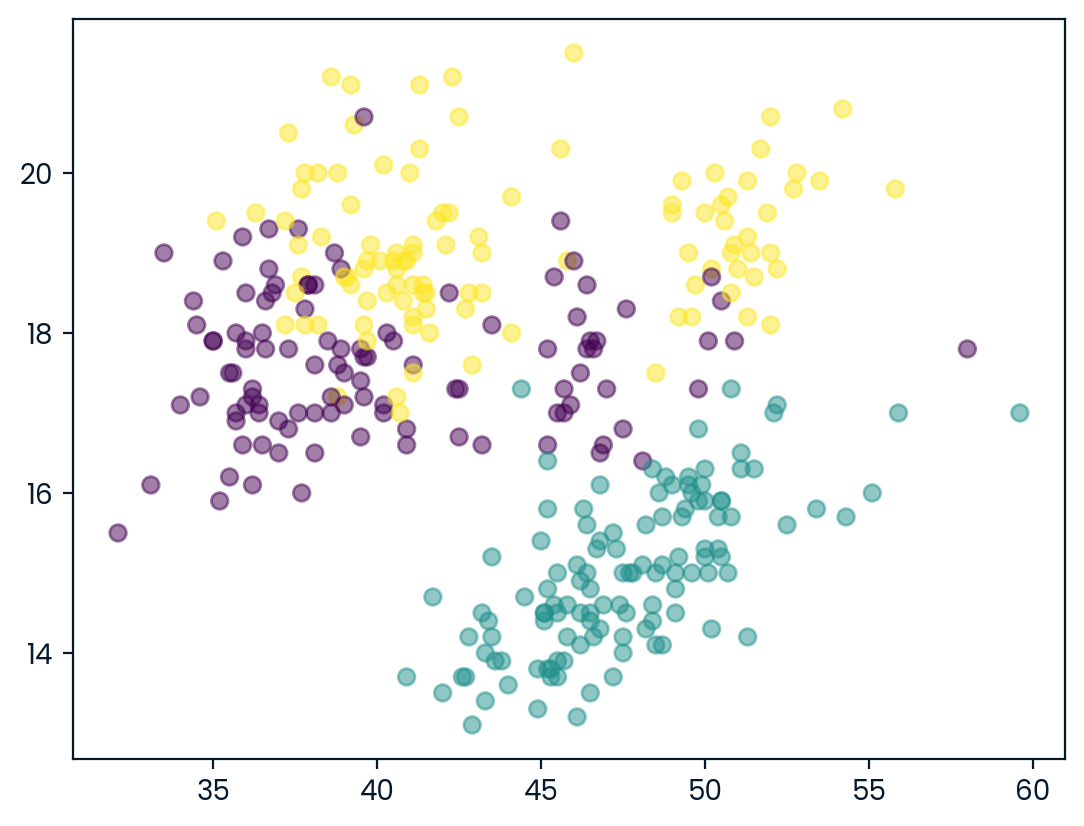

In [57]:
model = KMeans(n_clusters=3)
scaler = StandardScaler()
#use pipeline to preprocess and fit data at once
pipeline = make_pipeline(scaler, model)
pipeline.fit(penguins_dummies)

#generate labels using the model
labels = pipeline.predict(penguins_dummies)

#visualize the clusters using the labels
xs = penguins_df.iloc[:, 0]
ys = penguins_df.iloc[:, 1]
#make the scatter plot of xs and ys, using labels to color the plot
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.show()


In [58]:
#group the data using the clusters and calculate their average values
stat_penguins = penguins_df.groupby(labels).mean()
print(stat_penguins)

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         40.217757        17.611215         189.046729  3419.158879
1         47.568067        14.996639         217.235294  5092.436975
2         43.878302        19.111321         194.764151  4006.603774
